In [9]:
import tensorflow as tf
from tensorflow import keras

#Carregamento do dataset

dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

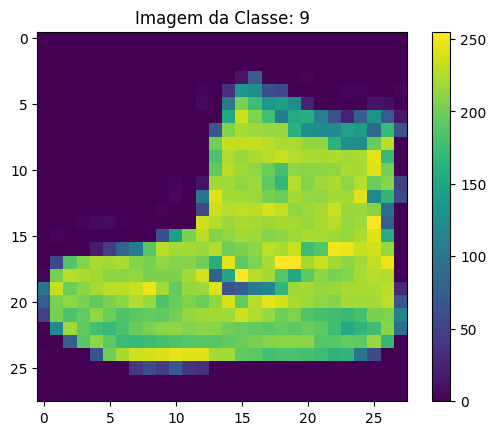

In [10]:
import matplotlib.pyplot as plt

## Visualização de uma imagem de treino

plt.imshow(imagens_treino[0])
plt.colorbar()
plt.title("Imagem da Classe: {}".format(identificacoes_treino[0])) 
plt.show()

In [11]:
# Tradução das Classes para Nomes
identificacoes_treino.max()
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 'Vestido', 'Casaco',
 'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota']

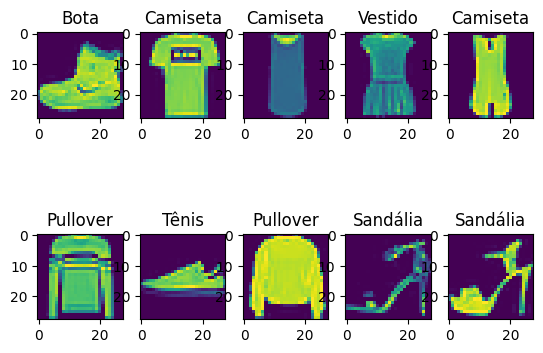

In [12]:
#Exibir as 10 Primeiras Imagens do Dataset
for imagem in range(10):
    plt.subplot(2,5,imagem+1)
    plt.imshow(imagens_treino[imagem])
    plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])

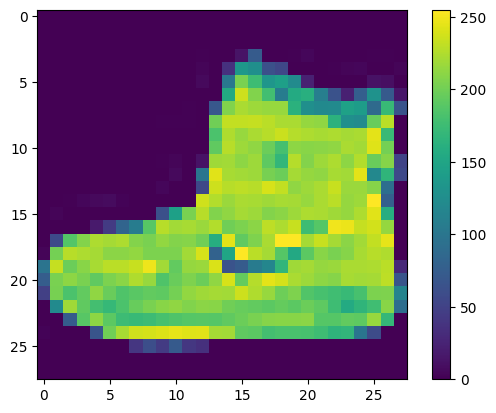

In [13]:
#Reexibir a Primeira Imagem
plt.imshow(imagens_treino[0])
plt.colorbar()

In [14]:
#Normalização das Imagens e Definição do Modelo
imagens_treino = imagens_treino/float(255)
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation= tf.nn.softmax)
])

In [15]:
#Compilação e Treinamento do Modelo
modelo.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=6, validation_split = 0.2)

Epoch 1/6
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5244 - accuracy: 0.8143 - val_loss: 0.4138 - val_accuracy: 0.8488
Epoch 2/6
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3977 - accuracy: 0.8541 - val_loss: 0.3630 - val_accuracy: 0.8704
Epoch 3/6
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3610 - accuracy: 0.8675 - val_loss: 0.3436 - val_accuracy: 0.8755
Epoch 4/6
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3404 - accuracy: 0.8740 - val_loss: 0.3402 - val_accuracy: 0.8782
Epoch 5/6
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3237 - accuracy: 0.8802 - val_loss: 0.3321 - val_accuracy: 0.8811
Epoch 6/6
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3072 - accuracy: 0.8873 - val_loss: 0.3216 - val_accuracy: 0.8828


In [ ]:
import os
from tensorflow.keras.models import load_model

os.makedirs('../models', exist_ok=True)

modelo.save('../models/fashion_mnist_model.keras')

modelo_salvo = load_model('../models/fashion_mnist_model.keras')


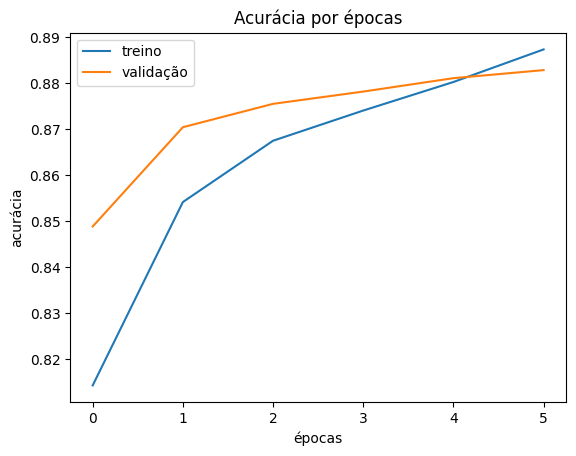

In [17]:
#Visualizando Acurácia por Época
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino','validação'])

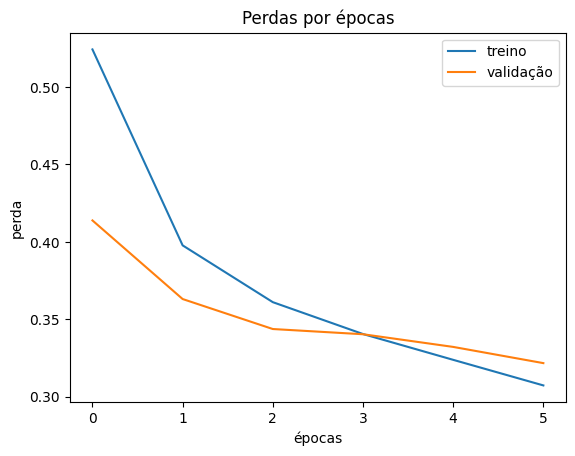

In [18]:
#Visualização da Perda (Loss) por Época
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perdas por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino','validação'])

In [19]:
#Teste do Modelo com Novos Dados
import numpy as np
teste = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(teste[0]))
print('número da imagem de teste:', identificacoes_teste[0])
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste', acuracia_teste)

313/313 [==============================] - 1s 3ms/step
resultado teste: 9
número da imagem de teste: 9
313/313 [==============================] - 0s 1ms/step - loss: 61.2431 - accuracy: 0.8482
Perda do teste: 61.24311828613281
Acurácia do teste 0.8482000231742859
